In [1]:
import pandas as pd

### To-do
• Check if you should use all variables
• Perhaps a transformation of (A / B) or (A – B) variables will be better than using A and B 
variables separately. This may also be easier to interpret
• Report the confusion matrix of your “best” model

In [2]:
df = pd.read_csv('train.csv')

### Data Exploration

In [3]:
# duplicate rows
df.duplicated().sum()

132

> THERE ARE DUPLICATE ROWS (exact match)

In [4]:
# missing values total 
df.isnull().sum().sum()

0

In [5]:
# remove duplicate rows
df = df.drop_duplicates()

In [6]:
df.columns

Index(['Choice', 'A_follower_count', 'A_following_count', 'A_listed_count',
       'A_mentions_received', 'A_retweets_received', 'A_mentions_sent',
       'A_retweets_sent', 'A_posts', 'A_network_feature_1',
       'A_network_feature_2', 'A_network_feature_3', 'B_follower_count',
       'B_following_count', 'B_listed_count', 'B_mentions_received',
       'B_retweets_received', 'B_mentions_sent', 'B_retweets_sent', 'B_posts',
       'B_network_feature_1', 'B_network_feature_2', 'B_network_feature_3'],
      dtype='object')

In [7]:
# create new datafram A + B 
df_A = df.iloc[:,2:12]
df_B = df.iloc[:, 13:]
df_choice = df['Choice']

In [8]:
df_choice.value_counts()

1    2736
0    2632
Name: Choice, dtype: int64

In [9]:
# stack A on B
df_stacked = pd.concat([df_A, df_B], axis=0).reset_index(drop=True)
df_stacked = df_stacked.loc[:, "A_following_count":"A_network_feature_3"]

In [10]:
# remove _A
df_exp = df_stacked.rename(columns=lambda x: x[2:])
df_exp.head()

,following_count,listed_count,mentions_received,retweets_received,mentions_sent,retweets_sent,posts,network_feature_1,network_feature_2,network_feature_3
0,302.0,3.0,0.583979,0.100503,0.100503,0.100503,0.362150,2.0,166.500000,11355.000000
1,1179.0,228.0,90.456506,25.798292,5.709329,1.111159,5.176620,369.0,18.442971,1330.366048
2,1215.0,101.0,25.503644,9.556347,5.361519,0.591206,3.589718,95.0,68.927835,5999.896907
3,7.0,2.0,7.690824,0.277306,1.331508,0.100503,2.830627,6.0,2.000000,96.166667
4,862.0,2641.0,148.854279,36.998884,27.881768,3.333492,23.861282,551.0,127.404293,2833.847943


In [11]:
# find if there are complete duplicate rows and show it
df_exp.duplicated().sum()

9949

> From this we know, that there are same people are compared with different people

In [12]:
# delete duplicate rows
df_exp = df_exp.drop_duplicates()

**Visualizations**

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

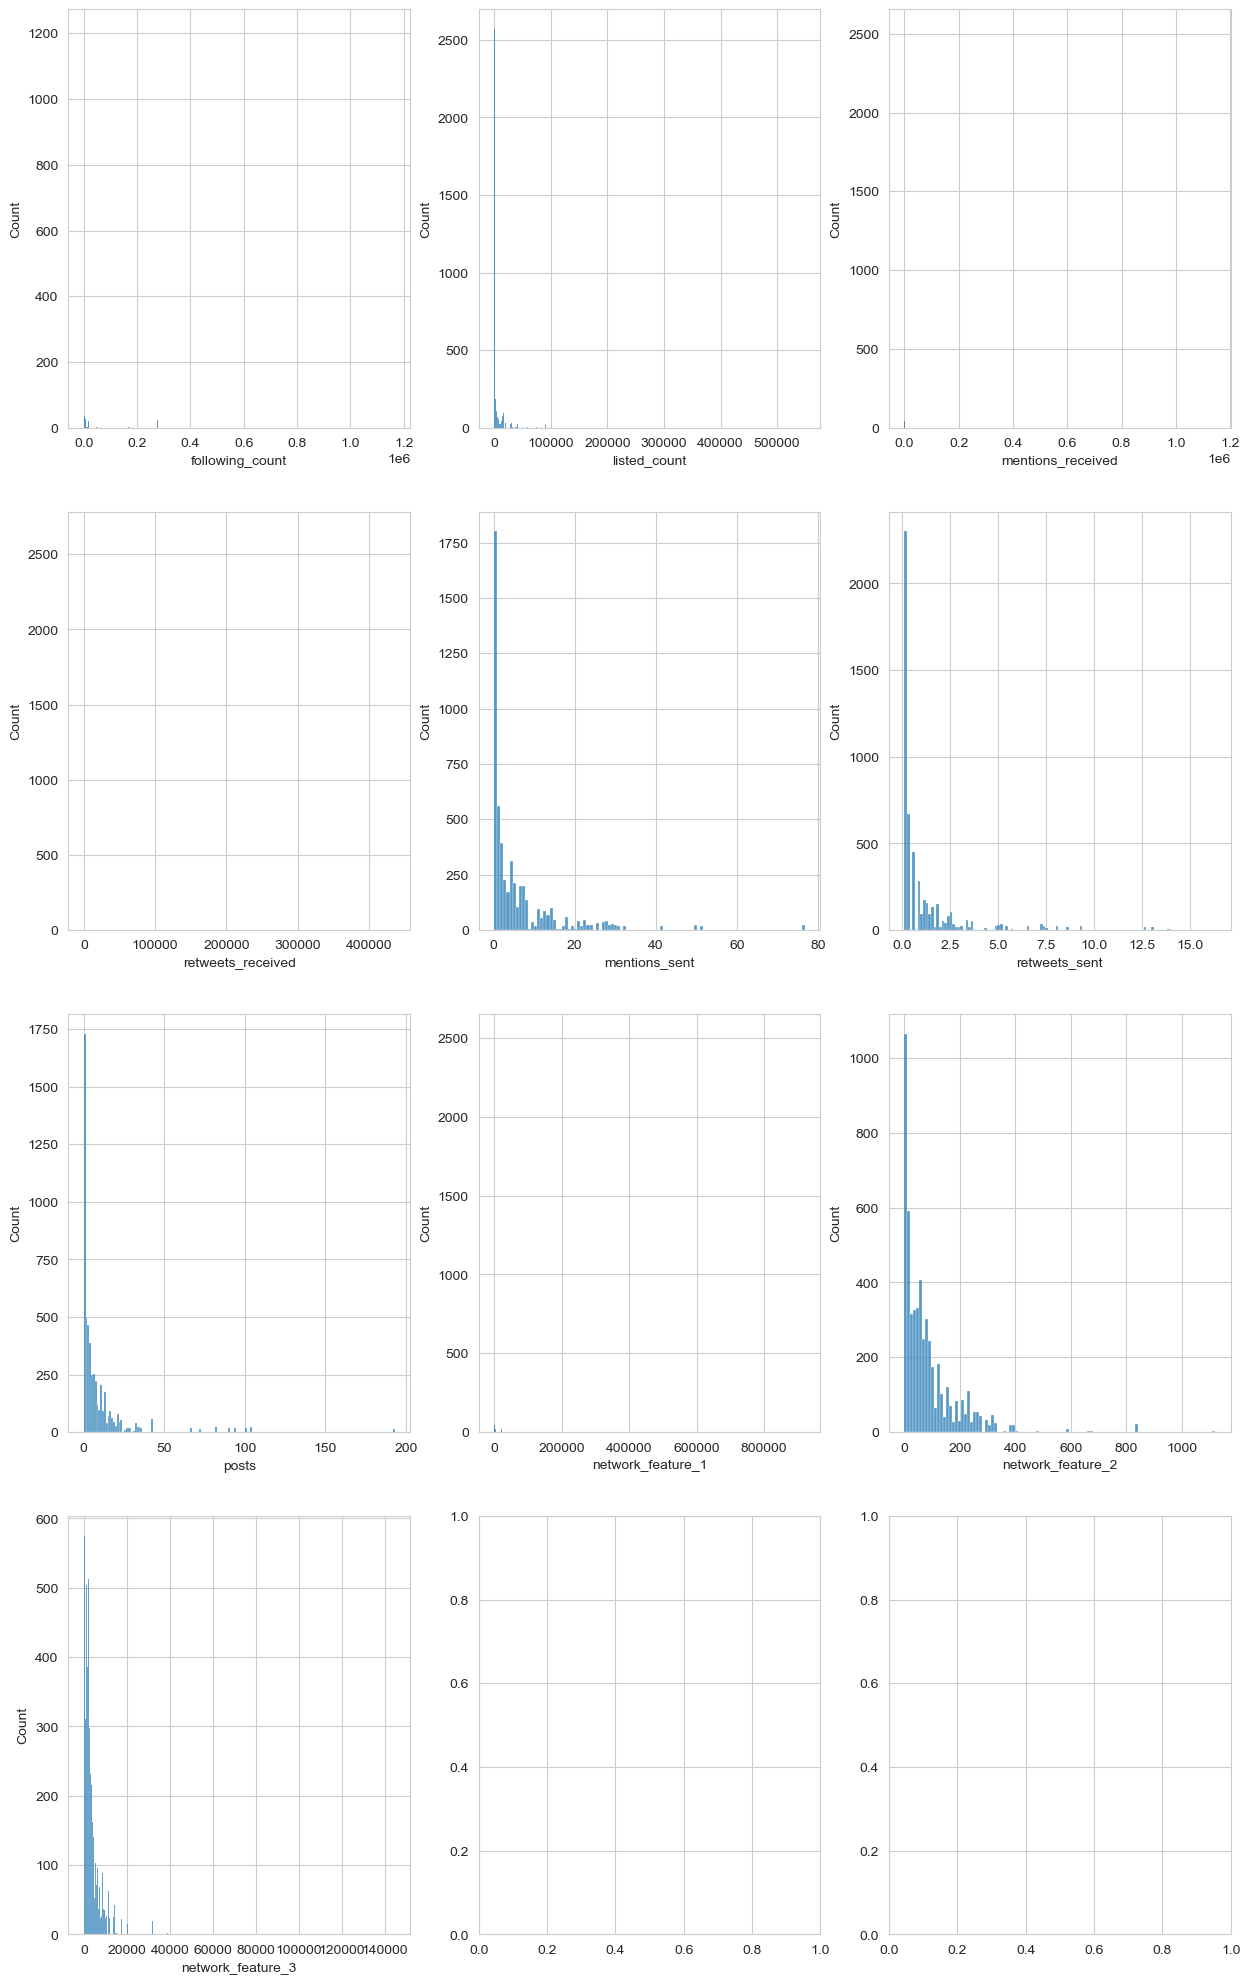

In [12]:
# distribution of variables in a figure
fig, ax = plt.subplots(4, 3, figsize=(15, 25))
for i, col in enumerate(df_exp.columns):
    sns.histplot(df_exp[col],  ax=ax[i//3, i%3])

**Check how the distribution of variables differe between Choice 0 vs1**

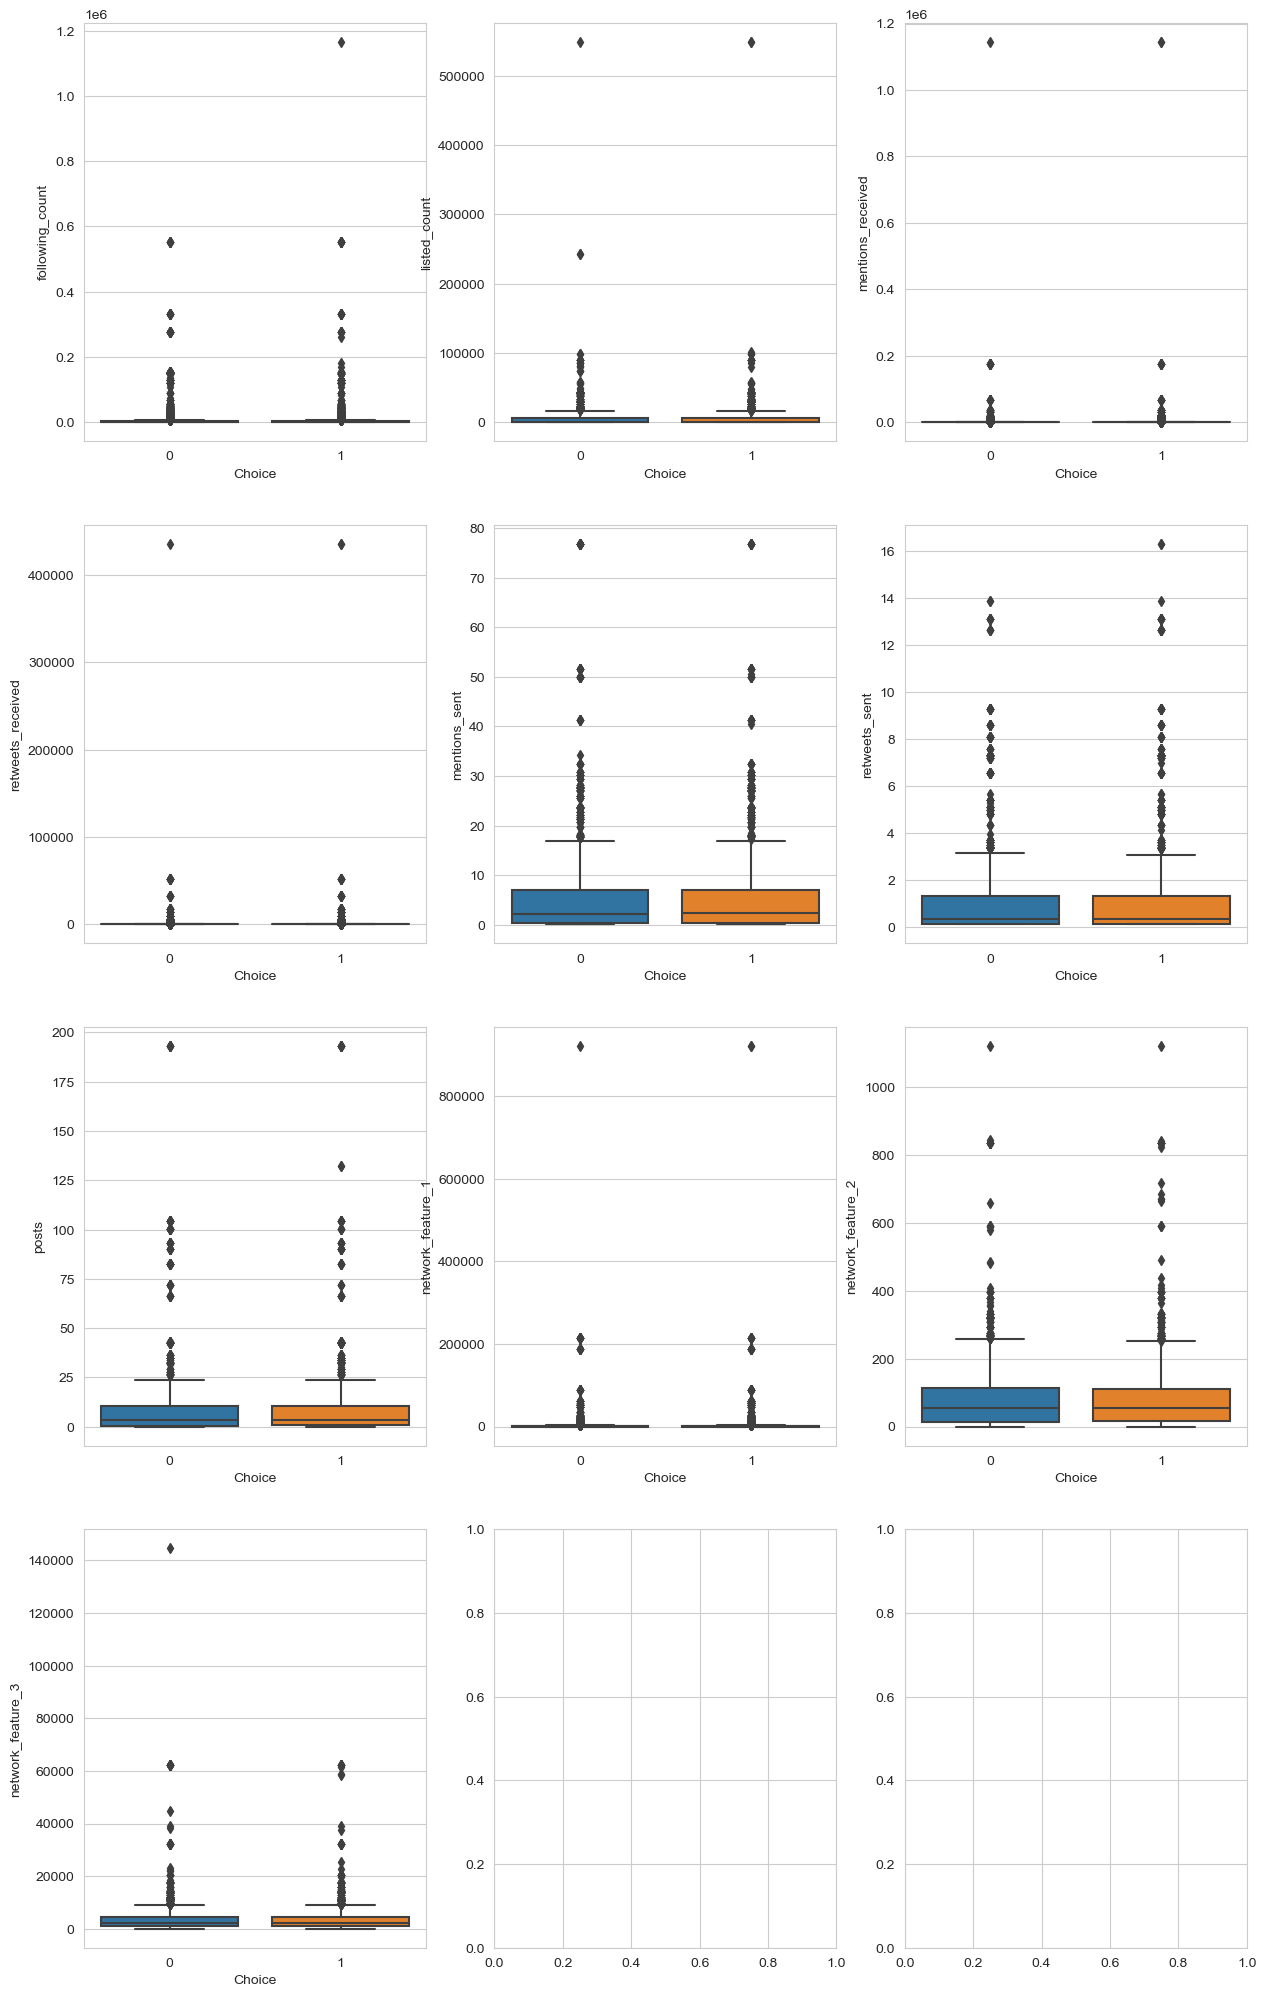

In [13]:
# distribution of variables - box plot in a figure
fig, ax = plt.subplots(4, 3, figsize=(15, 25))
for i, col in enumerate(df_exp.columns):
    sns.boxplot(x=df_choice, y=df_exp[col], ax=ax[i//3, i%3])

### Feautre Engineering

In [32]:
df2 = df.copy()

In [33]:
df = df2.copy()

In [34]:
df.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,diff_retweets_sent,diff_posts,diff_network_feature_1,diff_network_feature_2,diff_network_feature_3,ratio_follower_count_A/B,ratio_following_count_A/B,ratio_mentions_received_A/B,ratio_posts_A/B,diff_social_reach_engagement
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,-0.231920,-6.626665,-64,90.969697,9438.106061,0.006616,0.010132,0.037846,0.051819,-1524.630117
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,0.546816,4.106299,206,-113.587704,-1601.149290,0.549921,1.390330,2.233769,4.836508,-639.039386
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,0.490702,2.986516,92,58.594502,5722.563574,2.018222,2.520747,34.713166,5.951092,-3303.527358
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,-7.067053,-29.271279,-1756,-21.469296,-1299.678967,0.001022,0.000397,0.013425,0.088176,-17.837680
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,2.213765,19.298035,466,78.904293,840.220036,6.035081,0.503799,6.890806,5.229013,-47.639269


In [35]:
choice= df['Choice']

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
differential_features = ['follower_count', 'following_count', 'listed_count',
                         'mentions_received', 'retweets_received', 'mentions_sent',
                         'retweets_sent', 'posts', 'network_feature_1',
                         'network_feature_2', 'network_feature_3']

In [38]:
# 1. Differential Features
for feature in differential_features:
    df[f'diff_{feature}'] = df[f'A_{feature}'] - df[f'B_{feature}']

# 2. Ratio Features
ratio_features = ['follower_count', 'following_count', 'mentions_received', 'posts']
for feature in ratio_features:
    # add a very small number to the denominator to avoid division by zero
    df[f'ratio_{feature}_A/B'] = df[f'A_{feature}'] / (df[f'B_{feature}'] + 1e-6)

# 3. Interaction Features
df['social_reach_engagement_A'] = (df['A_follower_count'] + df['A_listed_count']) / (df['A_mentions_received'] + (df['A_retweets_received'])+ 1e-6) # this is to avoid division by 0
df['social_reach_engagement_B'] = (df['B_follower_count'] + df['B_listed_count']) / (df['B_mentions_received'] + (df['B_retweets_received'])+ 1e-6)


In [39]:
# get the difference of social reach engagement
df['diff_social_reach_engagement'] = df['social_reach_engagement_A'] - df['social_reach_engagement_B']

# drop the original columns
df.drop(columns=['social_reach_engagement_A', 'social_reach_engagement_B'], inplace=True)

In [40]:
# include the first column
df_engineered = df.iloc[:,24:]

# add back the choice column to the first col
df_engineered.insert(0, 'Choice', choice)

In [41]:
df_engineered.columns

Index(['Choice', 'diff_following_count', 'diff_listed_count',
       'diff_mentions_received', 'diff_retweets_received',
       'diff_mentions_sent', 'diff_retweets_sent', 'diff_posts',
       'diff_network_feature_1', 'diff_network_feature_2',
       'diff_network_feature_3', 'ratio_follower_count_A/B',
       'ratio_following_count_A/B', 'ratio_mentions_received_A/B',
       'ratio_posts_A/B', 'diff_social_reach_engagement'],
      dtype='object')

### Data Description

1. **`diff_following_count`**: The numerical difference in the number of accounts each entity (A and B) is following. Positive values indicate that Entity A follows more accounts, while negative values indicate Entity B follows more.

2. **`diff_listed_count`**: The difference in the number of times each entity is included in lists by other users, which may indicate the perceived importance or influence.

3. **`diff_mentions_received`**: The difference in the total number of mentions each entity has received from others, reflecting direct engagement and presence in the network.

4. **`diff_retweets_received`**: The difference in the total number of retweets each entity's posts have received, indicative of content reach and influence.

5. **`diff_mentions_sent`**: The difference in the number of mentions each entity has made, suggesting the level of outbound engagement or activity.

6. **`diff_retweets_sent`**: The difference in the number of retweets made by each entity, pointing to how actively they promote or engage with others' content.

7. **`diff_posts`**: The difference in the total number of posts or tweets made by each entity, highlighting who is more actively creating content.

8. **`diff_network_feature_1`**, **`diff_network_feature_2`**, **`diff_network_feature_3`**: The differences in three unspecified network features between the entities, potentially representing unique aspects of their network position, influence, or connectivity.

9. **`ratio_follower_count_A/B`**: The ratio of Entity A's followers to Entity B's followers, providing a measure of relative popularity or social reach between the two entities.

10. **`ratio_following_count_A/B`**: The ratio of the number of accounts Entity A is following to the number Entity B is following, offering insight into their respective outward social engagement or network breadth.

11. **`ratio_mentions_received_A/B`**: The ratio comparing how many times each entity has been mentioned by others, which could indicate relative visibility or engagement levels.

12. **`ratio_posts_A/B`**: The ratio of the number of posts or tweets by Entity A to that by Entity B, highlighting the relative content generation activity.

13. **`diff_social_reach_engagement`**: A differential metric combining aspects of social reach (like follower and listed counts) with engagement (mentions and retweets received), aimed at quantifying the overall influence or impact difference between the entities.



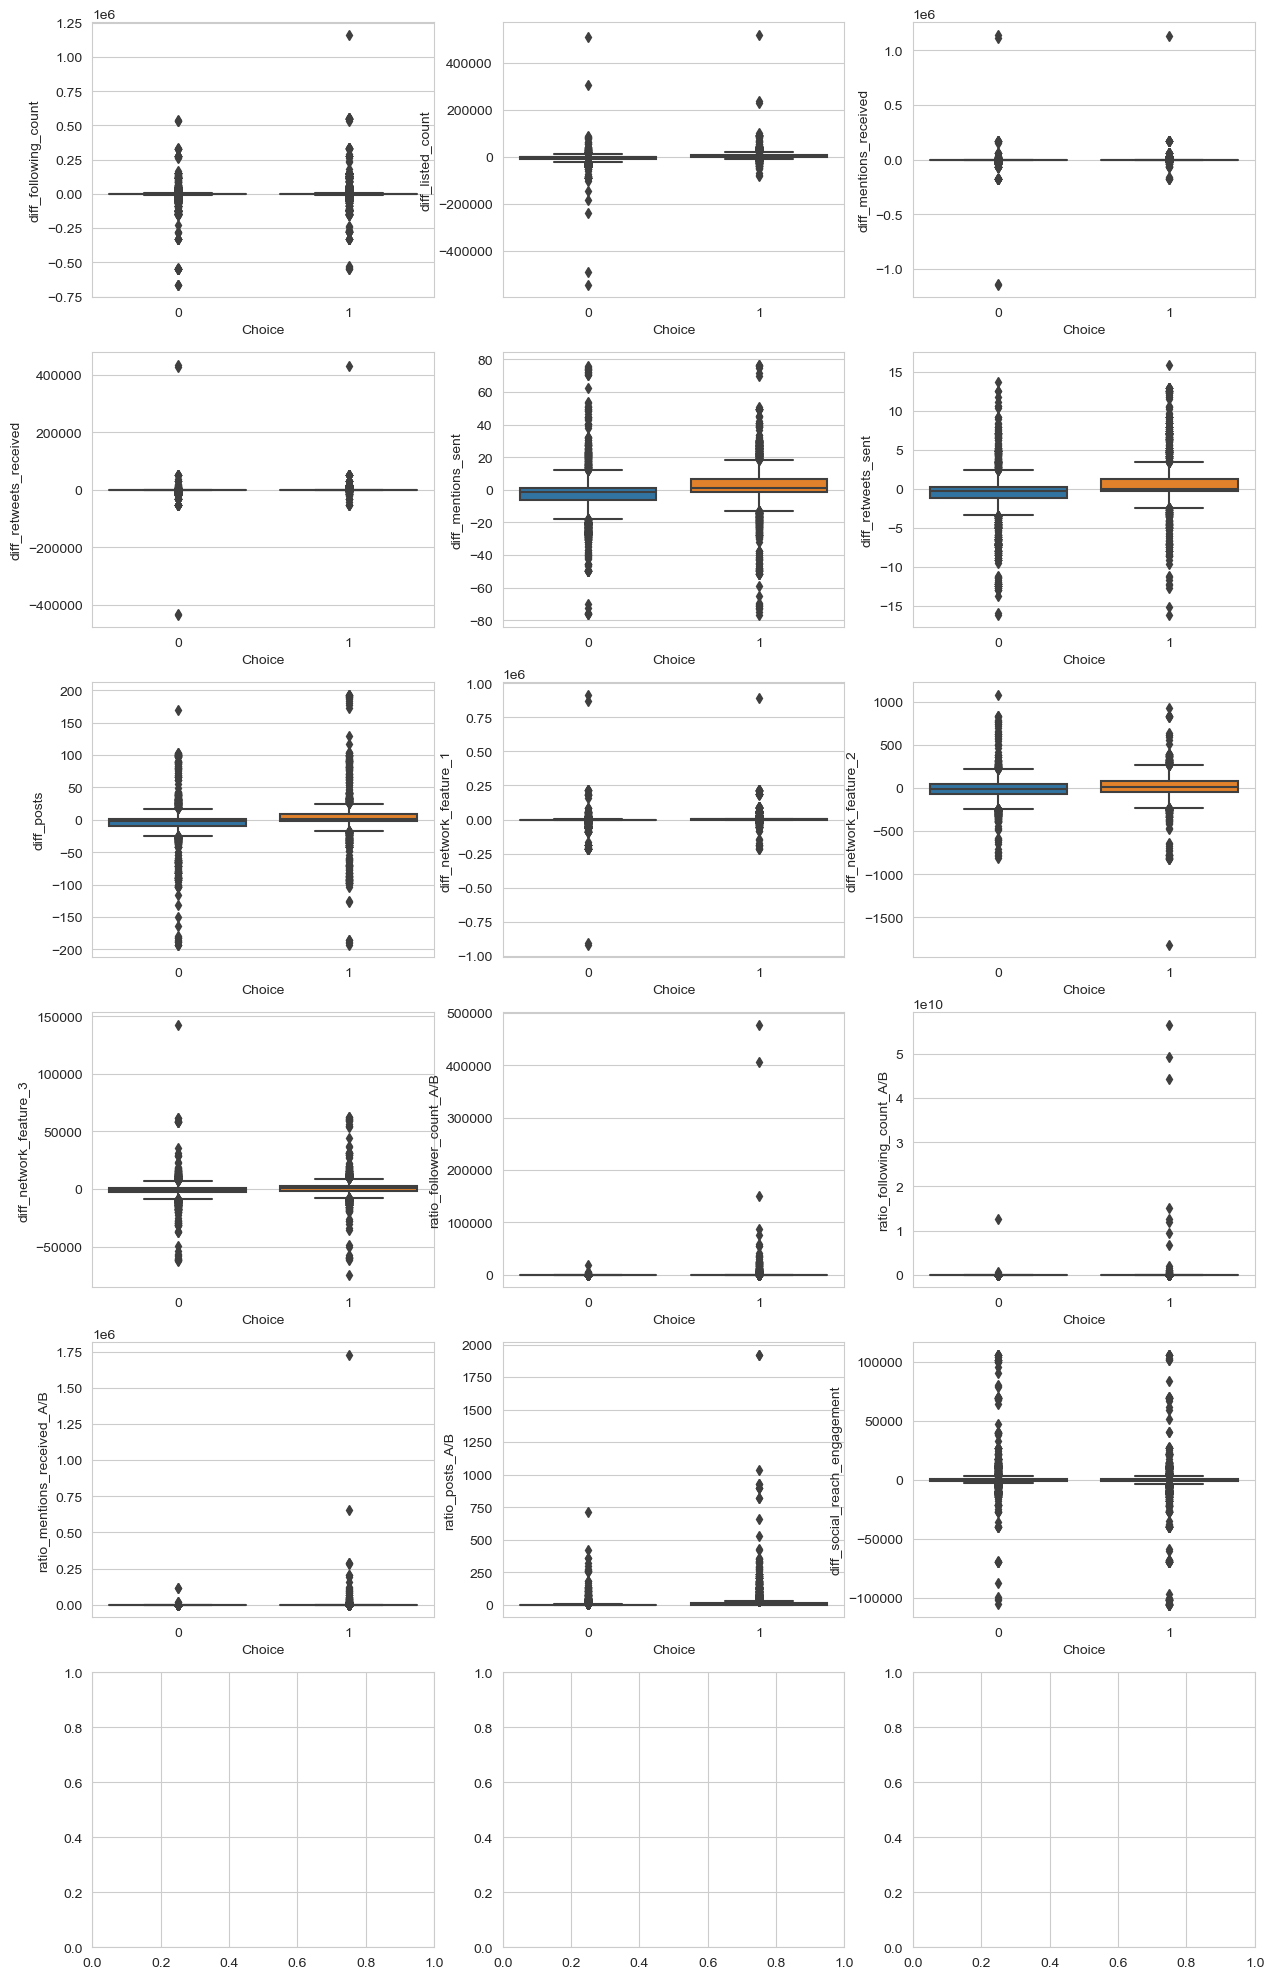

In [22]:
# distribution of variables - box plot in a figure
fig, ax = plt.subplots(6, 3, figsize=(15, 25))
for i, col in enumerate(df_engineered.columns):
    sns.boxplot(x=df_choice, y=df_engineered[col], ax=ax[i//3, i%3])

**Export data**

In [42]:
df_engineered.head()

,Choice,diff_following_count,diff_listed_count,diff_mentions_received,diff_retweets_received,diff_mentions_sent,diff_retweets_sent,diff_posts,diff_network_feature_1,diff_network_feature_2,diff_network_feature_3,ratio_follower_count_A/B,ratio_following_count_A/B,ratio_mentions_received_A/B,ratio_posts_A/B,diff_social_reach_engagement
0,0,-29506,-1686,-14.846518,-3.883525,-8.103828,-0.231920,-6.626665,-64,90.969697,9438.106061,0.006616,0.010132,0.037846,0.051819,-1524.630117
1,0,331,-1382,49.961485,16.854685,2.481652,0.546816,4.106299,206,-113.587704,-1601.149290,0.549921,1.390330,2.233769,4.836508,-639.039386
2,0,733,-105,24.768949,9.201969,4.758317,0.490702,2.986516,92,58.594502,5722.563574,2.018222,2.520747,34.713166,5.951092,-3303.527358
3,0,-17630,-276,-565.184032,-390.016375,-26.220532,-7.067053,-29.271279,-1756,-21.469296,-1299.678967,0.001022,0.000397,0.013425,0.088176,-17.837680
4,1,-849,2460,127.252413,33.417223,21.117111,2.213765,19.298035,466,78.904293,840.220036,6.035081,0.503799,6.890806,5.229013,-47.639269


In [43]:
df_engineered.to_csv('train_v2.csv', index=False)

In [44]:
pd.read_csv('train_v2.csv').head()

,Choice,diff_following_count,diff_listed_count,diff_mentions_received,diff_retweets_received,diff_mentions_sent,diff_retweets_sent,diff_posts,diff_network_feature_1,diff_network_feature_2,diff_network_feature_3,ratio_follower_count_A/B,ratio_following_count_A/B,ratio_mentions_received_A/B,ratio_posts_A/B,diff_social_reach_engagement
0,0,-29506,-1686,-14.846518,-3.883525,-8.103828,-0.231920,-6.626665,-64,90.969697,9438.106061,0.006616,0.010132,0.037846,0.051819,-1524.630117
1,0,331,-1382,49.961485,16.854685,2.481652,0.546816,4.106299,206,-113.587704,-1601.149290,0.549921,1.390330,2.233769,4.836508,-639.039386
2,0,733,-105,24.768949,9.201969,4.758317,0.490702,2.986516,92,58.594502,5722.563574,2.018222,2.520747,34.713166,5.951092,-3303.527358
3,0,-17630,-276,-565.184032,-390.016375,-26.220532,-7.067053,-29.271279,-1756,-21.469296,-1299.678967,0.001022,0.000397,0.013425,0.088176,-17.837680
4,1,-849,2460,127.252413,33.417223,21.117111,2.213765,19.298035,466,78.904293,840.220036,6.035081,0.503799,6.890806,5.229013,-47.639269
